In [1]:
from pipeline import *
from Module import *
from Loss import *

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


from numba import jit
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from mltools import *

In [2]:
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
alltrainx = MinMaxScaler().fit_transform(alltrainx)

In [3]:
cov1d = Conv1D(3,1,32,1)
maxpool1d = MaxPool1D(2,2)
flatten = Flatten()
lin1 = Linear(4064,100)
relu = ReLU()
lin2 = Linear(100,10)


seq = Sequentiel(cov1d,
                maxpool1d,
                flatten,
                lin1,
                relu,
                lin2)


In [4]:
idx = np.random.choice(len(alltrainx), 100)
alltrainx = alltrainx[idx][:,:,np.newaxis]
alltrainy_onehot = OneHotEncoder(sparse = False).fit_transform(alltrainy.reshape(-1,1))[idx]

In [5]:
n_iter = 100
ep = 1e-3
sq, loss = mini_SGD(seq,alltrainx, alltrainy_onehot, batch_size=1, eps=ep, loss_fonction=Softmax_CELoss(), nb_iteration=n_iter)

iteration 0 loss = 4.7777818077396805
iteration 20 loss = 1.7907289648002842
iteration 40 loss = 1.590609042495307
iteration 60 loss = 1.5718227052336886
iteration 80 loss = 1.5834545041524486


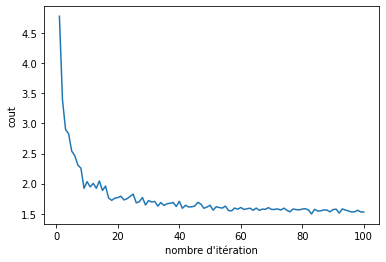

In [8]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("cout_cnn")
plt.show()

In [6]:
outputs = sq.forward(alltrainx)
yhat = np.argmax(outputs[-1],axis=1)

In [7]:
np.mean(yhat==alltrainy[idx])

0.94